## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"]) 

# Display the data table for preview
mouse_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
nr_mouse = len(mouse_complete['Mouse ID'].unique())


print(f' Number of mice is {nr_mouse}')


 Number of mice is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#group = mouse_complete["Mouse ID","Timepoint"].duplicated

Duplicated = mouse_complete[mouse_complete.duplicated(subset=['Mouse ID','Timepoint'], keep="first")]

print("Table showing duplicated mice")
Duplicated["Mouse ID"]

Table showing duplicated mice


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Data with all line duplications is already done previously, this the same female mouse with duplicated results
Duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])


In [6]:
# Checking the number of mice in the clean DataFrame.
nr_mouse_new = len(mouse_clean['Mouse ID'].unique())


print(f' Number of mice is still {nr_mouse_new}')

#number of test is different but total number of mice is still the same. 

 Number of mice is still 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, mean, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

grouped_regimen = mouse_clean.set_index("Drug Regimen").groupby(["Drug Regimen"])

grouped_regimen.head()

average_vol = grouped_regimen["Tumor Volume (mm3)"].mean()
median_vol = grouped_regimen["Tumor Volume (mm3)"].median()
var_vol = grouped_regimen["Tumor Volume (mm3)"].var()
stdev_vol = grouped_regimen["Tumor Volume (mm3)"].std()
sem_vol = grouped_regimen["Tumor Volume (mm3)"].sem()


summary_table = pd.DataFrame({
    "Average Volume": average_vol,
    "Median Volume": median_vol,
    "Var Vol": var_vol,
    "Std Dev Vol": stdev_vol,
    "SEM Vol": sem_vol,})

summary_table


,Average Volume,Median Volume,Var Vol,Std Dev Vol,SEM Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary=pd.DataFrame({"Average Volume":mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
                         "Median Volume":mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
                         "Var Vol":mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
                         "Std Dev Vol":mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
                         "SEM Vol":mouse_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()})

summary              

,Average Volume,Median Volume,Var Vol,Std Dev Vol,SEM Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

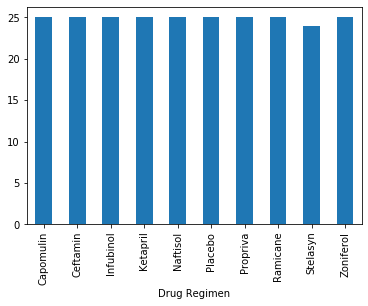

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_regiment = grouped_regimen["Mouse ID"].nunique()

mice_per_regiment.plot.bar()

#Discussions were made if this should be the number of tests undertaken per mouse or the number of unique mice
#To me it makes more sense showing the unique mice even if the result shows a very even distribution


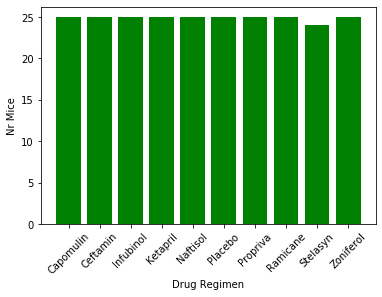

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drugs = mouse_clean["Drug Regimen"].sort_values(ascending=True).unique()
mice = grouped_regimen["Mouse ID"].nunique()

plt.bar(drugs,mice, color='green')

plt.xlabel('Drug Regimen')
plt.ylabel('Nr Mice')
plt.xticks(rotation=45)

plt.show()



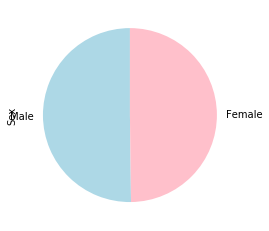

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Group_gender = mouse_clean.groupby(["Mouse ID"]).first()

Gender_nr = Group_gender.Sex.value_counts()

Male_nr = Gender_nr["Male"]
Female_nr = Gender_nr["Female"]

colors = ["lightblue", "pink"]

Gender_nr.plot.pie(startangle=90, colors = colors)

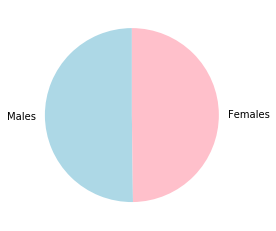

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender_nr,labels=["Males","Females"],startangle=90,colors = colors)

plt.show()

#Honestly I didn't spend much time here for better presentation

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


Capomulin = mouse_clean[mouse_clean["Drug Regimen"]=="Capomulin"]
Ramicane = mouse_clean[mouse_clean["Drug Regimen"]=="Ramicane"]
Infubinol = mouse_clean[mouse_clean["Drug Regimen"]=="Infubinol"]
Ceftamin = mouse_clean[mouse_clean["Drug Regimen"]=="Ceftamin"]

four_drug = pd.concat([Capomulin,Ramicane,Infubinol,Ceftamin])


# Start by getting the last (greatest) timepoint for each mouse
Grouped_mouse = mouse_clean.groupby(["Mouse ID"])
Grouped_mouse.head()
Last_time = Grouped_mouse['Timepoint'].last()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor = pd.merge(four_drug, Last_time, how="inner", on=["Mouse ID", "Timepoint"]) 

mouse_tumor



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
95,x226,Ceftamin,Male,23,28,0,45.000000,0
96,x581,Ceftamin,Female,19,28,45,64.634949,3
97,x822,Ceftamin,Male,3,29,45,61.386660,3
98,y769,Ceftamin,Female,6,27,45,68.594745,4


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_Capomulin = mouse_tumor[mouse_tumor["Drug Regimen"]=="Capomulin"]
tumor_volume_Ramicane = mouse_tumor[mouse_tumor["Drug Regimen"]=="Ramicane"]
tumor_volume_Infubinol = mouse_tumor[mouse_tumor["Drug Regimen"]=="Infubinol"]
tumor_volume_Ceftamin = mouse_tumor[mouse_tumor["Drug Regimen"]=="Ceftamin"]


#Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_quartiles = tumor_volume_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

Ramicane_quartiles = tumor_volume_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

Infubinol_quartiles = tumor_volume_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

Ceftamin_quartiles = tumor_volume_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

    
    # Determine outliers using upper and lower bounds
Outlier_Capomulin = tumor_volume_Capomulin[(tumor_volume_Capomulin["Tumor Volume (mm3)"]>Capomulin_upperq)|(tumor_volume_Capomulin["Tumor Volume (mm3)"]<Capomulin_lowerq)]
Outlier_Ramicane = tumor_volume_Ramicane[(tumor_volume_Ramicane["Tumor Volume (mm3)"]>Ramicane_upperq)|(tumor_volume_Ramicane["Tumor Volume (mm3)"]<Ramicane_lowerq)]
Outlier_Infubinol = tumor_volume_Infubinol[(tumor_volume_Infubinol["Tumor Volume (mm3)"]>Infubinol_upperq)|(tumor_volume_Infubinol["Tumor Volume (mm3)"]<Infubinol_lowerq)]
Outlier_Ceftamin = tumor_volume_Ceftamin[(tumor_volume_Ceftamin["Tumor Volume (mm3)"]>Ceftamin_upperq)|(tumor_volume_Ceftamin["Tumor Volume (mm3)"]<Ceftamin_lowerq)]

Outliers_table = pd.DataFrame({
    "Outlier_Capomulin": Outlier_Capomulin["Mouse ID"],
    "Outlier_Ramicane": Outlier_Ramicane["Mouse ID"],
    "Outlier_Infubinol": Outlier_Infubinol["Mouse ID"],
    "Outlier_Ceftamin": Outlier_Ceftamin["Mouse ID"]})

#Shows all mice that were outliers in the 4 treatments
Outliers_table


,Outlier_Capomulin,Outlier_Ramicane,Outlier_Infubinol,Outlier_Ceftamin
0,s185,NaN,NaN,NaN
1,x401,NaN,NaN,NaN
2,m601,NaN,NaN,NaN
3,f966,NaN,NaN,NaN
4,u364,NaN,NaN,NaN
5,y793,NaN,NaN,NaN
18,v923,NaN,NaN,NaN
20,s710,NaN,NaN,NaN
21,l509,NaN,NaN,NaN
22,r944,NaN,NaN,NaN


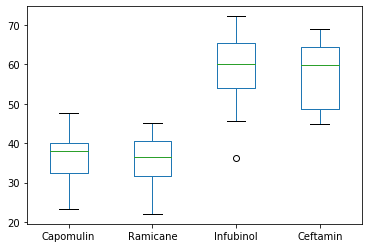

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = {'Capomulin': tumor_volume_Capomulin['Tumor Volume (mm3)'],
        'Ramicane': tumor_volume_Ramicane['Tumor Volume (mm3)'],
        'Infubinol': tumor_volume_Infubinol['Tumor Volume (mm3)'],
        'Ceftamin': tumor_volume_Ceftamin['Tumor Volume (mm3)']}

data = pd.DataFrame(data)


data.plot(kind = "box")

#one of the mice for the infubinol stand our considerably as an outlier

## Line and Scatter Plots

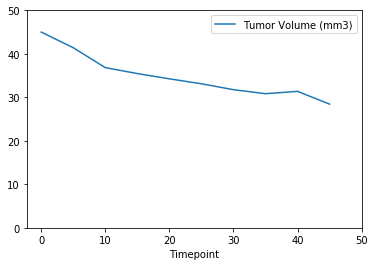

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# M601 is a mouse treated with capomulin

mouse_capomulin = mouse_clean[mouse_clean["Mouse ID"]=="m601"]

ticks = [0,10,20,30,40,50]
        
mouse_capomulin.plot(x = 'Timepoint',y = 'Tumor Volume (mm3)',yticks = ticks, xticks = ticks)


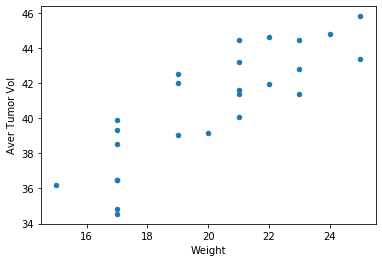

In [72]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_regimen = mouse_clean[mouse_clean["Drug Regimen"]=="Capomulin"]

grouped_capomulin = capomulin_regimen.groupby(["Mouse ID"])                     
grouped_capomulin["Weight (g)"].first()
grouped_capomulin["Tumor Volume (mm3)"].mean()

final = {'Weight': grouped_capomulin["Weight (g)"].first(),
        'Aver Tumor Vol': grouped_capomulin["Tumor Volume (mm3)"].mean()}

mouse_final = pd.DataFrame(final)


mouse_final.plot(kind="scatter",x = 'Weight',y = 'Aver Tumor Vol')



## Correlation and Regression

Text(15, 40, 'y = 0.95x + 21.55')

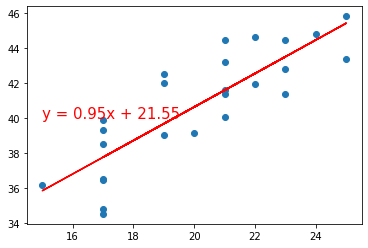

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_final['Weight']
y_values = mouse_final['Aver Tumor Vol']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,40),fontsize=15,color="red")

In [74]:
correlation = st.pearsonr(x_values,y_values)

print(f'Correlation is {round(correlation[0],2)} which is significantly high positive correlation')


Correlation is 0.84 which is significantly high positive correlation


In [ ]:
#This homework could be way better! My apologies as I had a very limited time this week and I'd need to focus on next week now:)  